Generating libraries


In [118]:
import jax
import numpy as np
import jax.numpy as jnp
import jax.numpy.fft as jfft
import numpy as np
from jax import random
from numpy import sqrt
from numpy import round
from matplotlib import pyplot as plt
from matplotlib import contour
from jax.numpy.fft import fft2, ifft2
from numpy import real


2d allen cahn equations

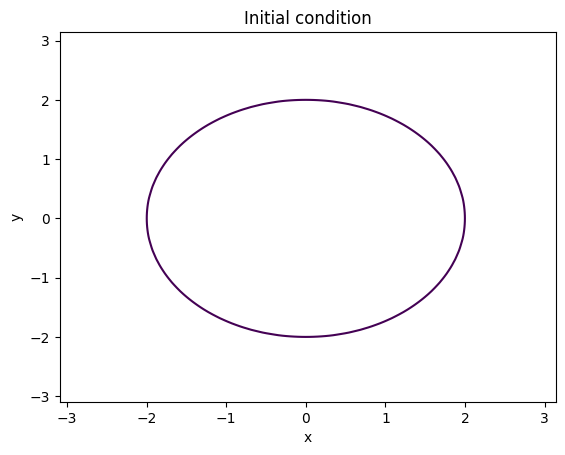

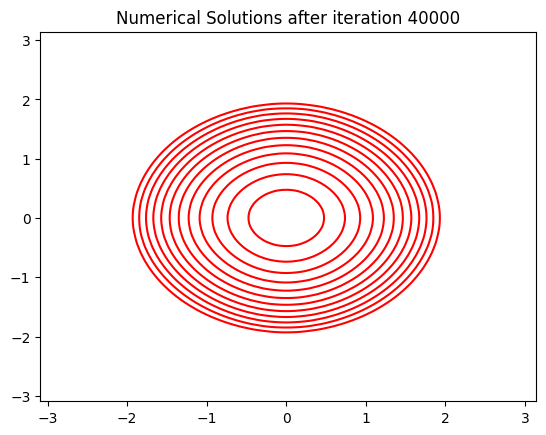

In [157]:
# Define the parameters

Nx = 128 # number of grid points in x be positive even integer number
Ny = 128 # number of grid points in y be positive even integer number
Lx = 2.0 * jnp.pi #length of the domain in x
Ly = 2.0 * jnp.pi #length of the domain in y
hx = Lx / Nx #spatial step size in coordinate x
hy = Ly / Ny #spatial step size in coordinate y
dt = 0.0001 #time step size
T = 4 #final time
Nt = int(jnp.round(T/dt)) #number of time steps
ns = Nt / 20 #number of snapshots

def x_gridpoint(Nx, Lx, hx):
    x = jnp.linspace(-0.5*Lx+hx,0.5*Lx,Nx)
    return x
x = x_gridpoint(Nx, Lx, hx) #number of grid points in x direction and step size and limitation on x  axis
def y_gridpoint(Ny, Ly, hy):
    y = jnp.linspace(-0.5*Ly+hy,0.5*Ly,Ny)
    return y
y = y_gridpoint(Ny, Ly, hy) #number of grid points in y direction and step size and limitation on y  axis 

xx,yy = jnp.meshgrid(x,y) #creating meshgrid in x and y direction 

epsillon = 0.05 #small parameter
cahn = epsillon**2 #cahn number  

u =jnp.tanh((2 -sqrt(xx**2 + yy**2)) / (sqrt(2) *epsillon)) #initial condition of allen cahn equation

p = jnp.concatenate([2 * jnp.pi / Lx * jnp.arange(0, Nx//2), 2 * jnp.pi / Lx * jnp.arange(-Nx//2 + 1, 1)]) # wavenumber in x direction
q = jnp.concatenate([2 * jnp.pi / Ly * jnp.arange(0, Ny//2), 2 * jnp.pi / Ly * jnp.arange(-Ny//2 + 1, 1)]) # wavenumber in y direction
p2 = p**2 # square of wavenumber in x direction
q2 = q**2 # square of wavenumber in y direction

pp2, qq2 = jnp.meshgrid(p2, q2) # creating meshgrid in x and y direction for square of wavenumber



figure1 = plt.figure()
plt.contour(x, y, jnp.real(u.T), [0])
plt.title('Initial condition')
# # axis = ([x[1], x[Nx], y[1], y[Ny]])
# # plt.pause(0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


for iter in range(1, Nt):
    u = jnp.real(u)

    s_hat = jfft.fft2(cahn * u - dt * (u**3 - 3 * u))
    v_hat = s_hat / (cahn + dt * (2 + cahn * (pp2 + qq2)))
    u = jfft.ifft2(v_hat)
    if iter % ns == 0:
        plt.contour(x, y, jnp.real(u.T), [0], colors='red')
        # plt.figure(1)
plt.title('Numerical Solutions after iteration '+str(Nt))
plt.show()
        # axis = plt.axis([x[1], x[Nx], y[1], y[Ny]])
        # plt.pause(0.01)
  
